In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
data=pd.read_csv("C:\Users\deept\Downloads\auto-mpg.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_37324/310833801.py, line 1)

In [7]:
data=pd.read_csv("auto-mpg.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [18]:
data.iloc[32]

mpg                   25.0
cylinders                4
displacement          98.0
horsepower               ?
weight                2046
acceleration          19.0
model year              71
origin                   1
car name        ford pinto
Name: 32, dtype: object

In [9]:
df=data.copy()

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [14]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [16]:
df[df.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [21]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [23]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [24]:
df['horsepower'].median()

93.5

In [26]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [30]:
type(df['horsepower'][1])

str

In [32]:
df['horsepower']=df['horsepower'].astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model year'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

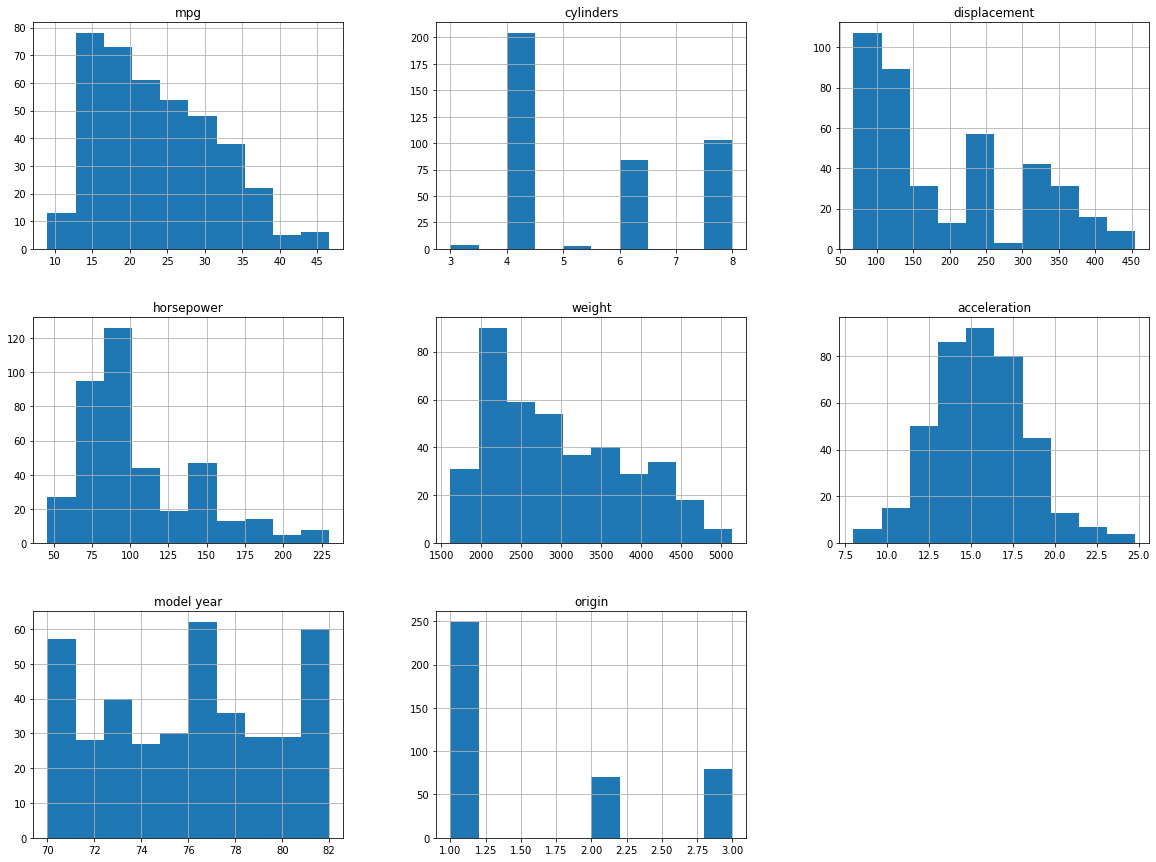

In [34]:

df.hist(figsize=(20,15))

C:\Users\deept\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\deept\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\deept\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='model year', ylabel='Density'>

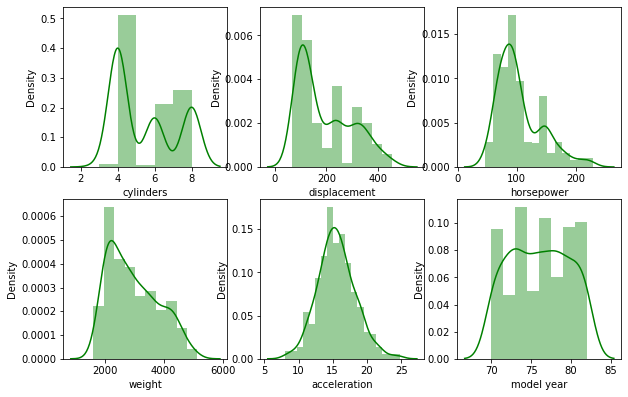

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.distplot(df['cylinders'],color="green")

plt.subplot(3,3,2)
sns.distplot(df['displacement'],color="green")


plt.subplot(3,3,3)
sns.distplot(df['horsepower'],color="green")
plt.subplot(3,3,4)
sns.distplot(df['weight'],color="green")

plt.subplot(3,3,5)
sns.distplot(df['acceleration'],color="green")

plt.subplot(3,3,6)
sns.distplot(df['model year'],color="green")


<AxesSubplot:xlabel='origin'>

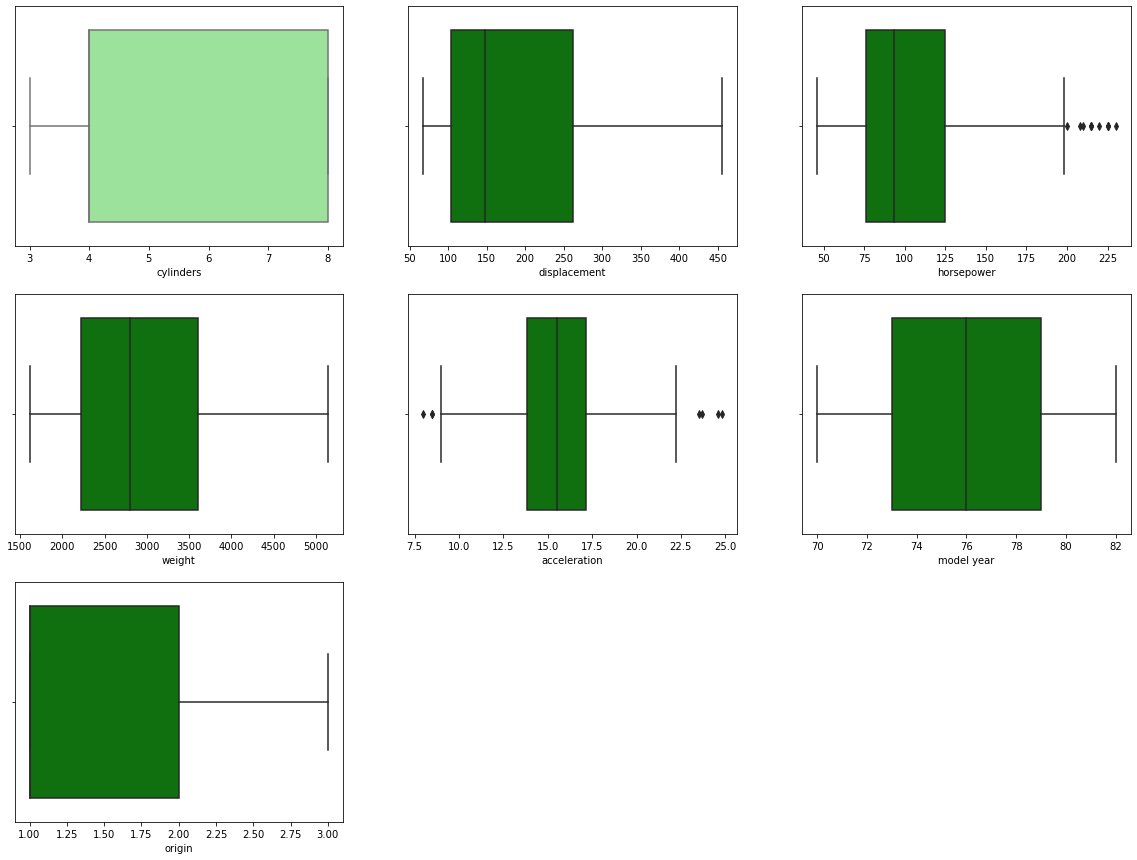

In [38]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x=df['cylinders'],color="lightgreen")

plt.subplot(3,3,2)
sns.boxplot(x=df['displacement'],color="green")


plt.subplot(3,3,3)
sns.boxplot(x=df['horsepower'],color="green")
plt.subplot(3,3,4)
sns.boxplot(x=df['weight'],color="green")

plt.subplot(3,3,5)
sns.boxplot(x=df['acceleration'],color="green")

plt.subplot(3,3,6)
sns.boxplot(x=df['model year'],color="green")

plt.subplot(3,3,7)
sns.boxplot(x=df['origin'],color="green")

In [41]:
df['horsepower']=df['horsepower'].clip(lower=df['horsepower'].quantile(0.05),upper=df['horsepower'].quantile(0.95))
df['acceleration']=df['acceleration'].clip(lower=df['acceleration'].quantile(0.05),upper=df['acceleration'].quantile(0.95))


C:\Users\deept\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

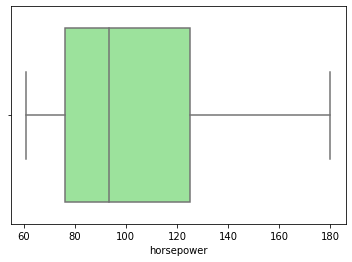

In [43]:
sns.boxplot(df['horsepower'],color='lightgreen')

In [44]:
df.shape

(398, 9)

In [45]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.792918,-0.831741,0.413128,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.867813,0.896017,-0.510533,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.904191,0.932824,-0.540627,-0.370164,-0.609409
horsepower,-0.792918,0.867813,0.904191,1.000000,0.881944,-0.683607,-0.411420,-0.466110
weight,-0.831741,0.896017,0.932824,0.881944,1.000000,-0.425769,-0.306564,-0.581024
acceleration,0.413128,-0.510533,-0.540627,-0.683607,-0.425769,1.000000,0.272241,0.206228
model year,0.579267,-0.348746,-0.370164,-0.411420,-0.306564,0.272241,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.466110,-0.581024,0.206228,0.180662,1.000000


<AxesSubplot:>

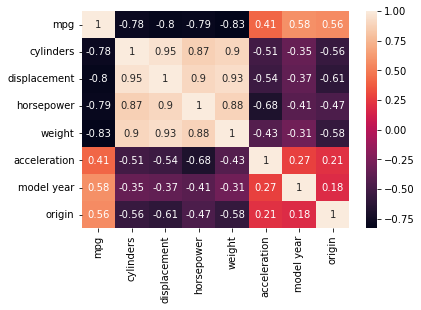

In [46]:
sns.heatmap(df.corr(),annot=True)

In [48]:
import numpy as np
corrMatrix=df.corr().abs()

upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
corrFutures = [column for column in upperMatrix.columns if any(upperMatrix[column] > 0.90)]

df.drop(columns=corrFutures)

C:\Users\deept\AppData\Local\Temp/ipykernel_37324/2363021462.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))


,mpg,cylinders,acceleration,model year,origin,car name
0,18.0,8,12.000,70,1,chevrolet chevelle malibu
1,15.0,8,11.500,70,1,buick skylark 320
2,18.0,8,11.285,70,1,plymouth satellite
3,16.0,8,12.000,70,1,amc rebel sst
4,17.0,8,11.285,70,1,ford torino
...,...,...,...,...,...,...
393,27.0,4,15.600,82,1,ford mustang gl
394,44.0,4,20.415,82,2,vw pickup
395,32.0,4,11.600,82,1,dodge rampage
396,28.0,4,18.600,82,1,ford ranger


In [49]:
x=df.drop(['mpg','car name'],axis=1)
y=df['mpg']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.843021767950621

C:\Users\deept\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

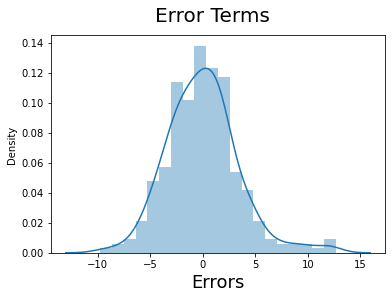

In [53]:
y_train_pred=model.predict(x_train)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)